# Rank Transformation and Histogram Matching

This tutorial shows an application of the module `tropy.analysis_tools.statistics`. It shows 

* How to transform a (2-dim) input field into a field of ranks.
* How to perform histogram matching.

## Import Libraries

In [1]:
%matplotlib inline

# standard libs
import numpy as np
import scipy.ndimage

# plotting and mapping
import pylab as plt
import seaborn as sns
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (8, 6)

# the own tropy lib
import tropy.analysis_tools.statistics

SimpleITK not available.


## Making Example Data 

We make some random example data for plotting.

In [2]:
nrow, ncol = 180, 200

r = 4 * np.random.randn( nrow, ncol )
rpoi = 4 * np.random.poisson( size = (nrow, ncol) )

# smoothing
r_sm = scipy.ndimage.gaussian_filter(r, 2 )


# non-linear transformation
dset = np.exp( r_sm )

## Apply Rank Transformation 

The rank transformation sorts the data in ascending order. We return rank data normalized between zero and one, i.e. the minimum gets the zero and the maximum gets the one. 

In [3]:
frank = tropy.analysis_tools.statistics.rank_transformation( r_sm )

### Check Histograms 

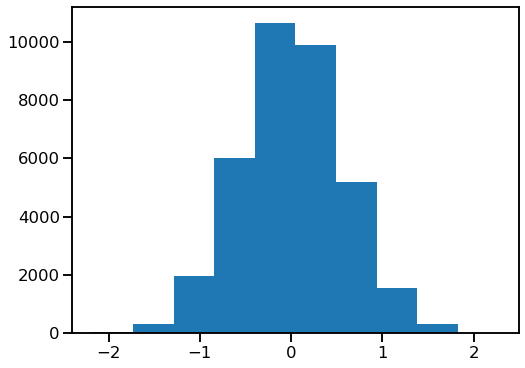

In [4]:
plt.hist( r_sm.flatten() );

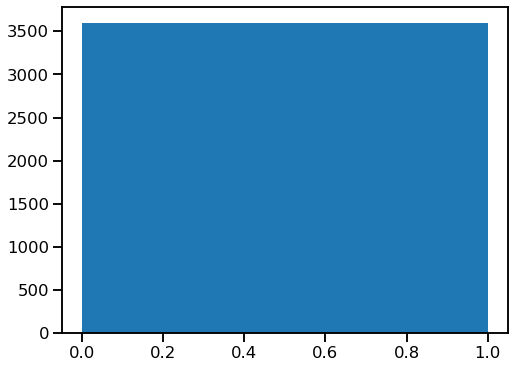

In [5]:
plt.hist( frank.flatten() );

You see that rank data are uniformly distributed that has some advantages for histogram matching. Rank transformation only depends on data order and is same for different non-linear transformations of the intial data.

### CDF from Rank Transformation

Okay, this is really easy - we just plot the one against the another.

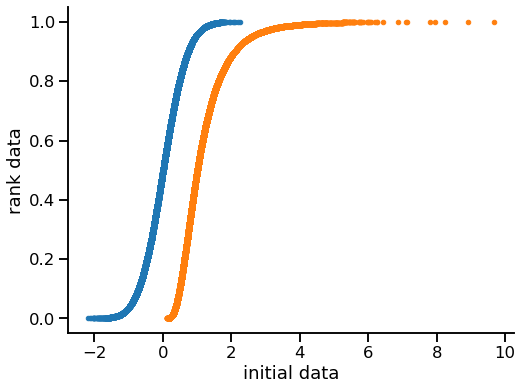

In [6]:
plt.plot( r_sm.flatten(), frank.flatten(), '.')
plt.plot( dset.flatten(), frank.flatten(), '.')

plt.xlabel( 'initial data' )
plt.ylabel( 'rank data')
sns.despine()

## Rank Transformation to Stretch Color Range

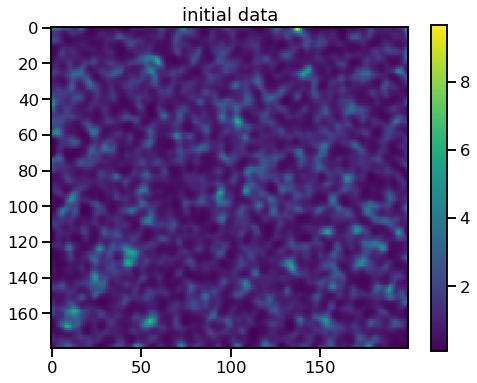

In [7]:
plt.imshow( dset )
plt.title( 'initial data')
plt.colorbar();

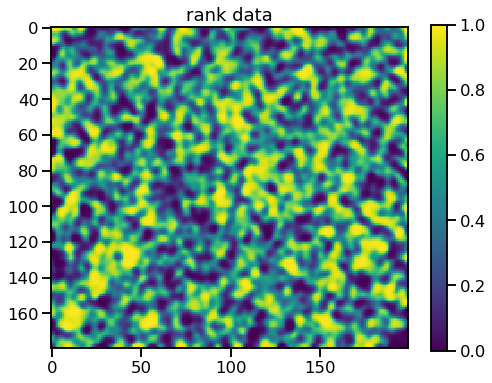

In [8]:
plt.imshow( frank )
plt.title( 'rank data' )
plt.colorbar();

## Histogram Matching

We apply histogram matching to transform input data such that 

* order of the data remains
* final distribution matches the distribution of template data

### Data with Different Distributions 

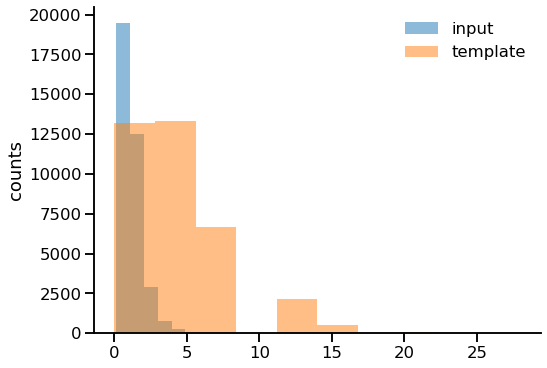

In [9]:
plt.hist( dset.flatten(), label = 'input', alpha = 0.5);
plt.hist( rpoi.flatten(), label = 'template', alpha = 0.5);

plt.ylabel( 'counts')
plt.legend(frameon = False)
sns.despine()

Now, we apply a non-inear transformation to the input dataset `dset`. As result, the transformed data `dset_t` have the same distribution as `rpoi`.

### Applying the Matching

In [10]:
dset_t = tropy.analysis_tools.statistics.fdistrib_mapping( dset, rpoi )

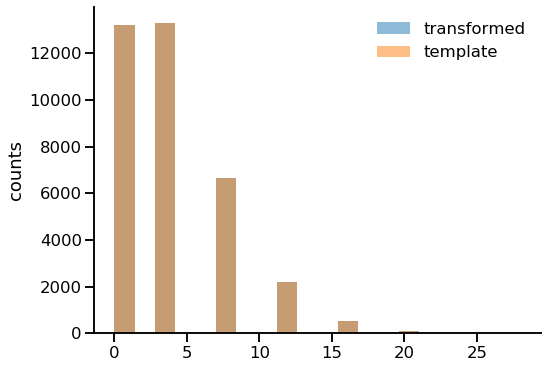

In [11]:
plt.hist( dset_t.flatten(), 20, label = 'transformed', alpha = 0.5);
plt.hist( rpoi.flatten(),  20, label = 'template', alpha = 0.5);

plt.ylabel( 'counts')
plt.legend(frameon = False)
sns.despine()

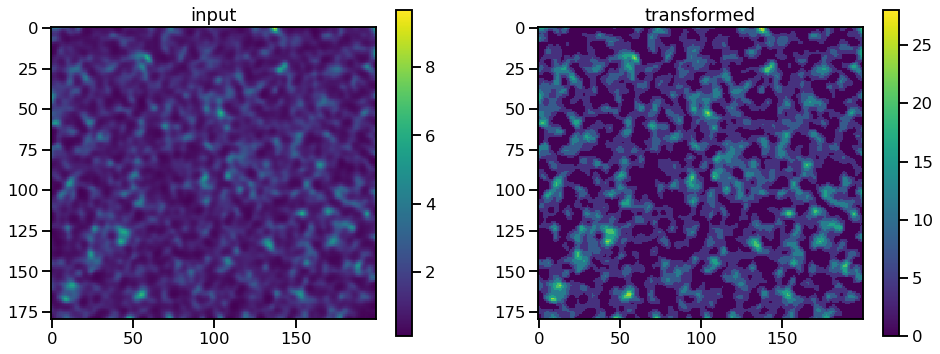

In [12]:
fig, ax = plt.subplots( ncols = 2, figsize = (16, 6) )

plt.sca (ax[0])
plt.imshow( dset )
plt.title( 'input' )
plt.colorbar()

plt.sca (ax[1])
plt.imshow( dset_t )
plt.title( 'transformed' )
plt.colorbar();



## Summary

The module `tropy.analysis_tools.statistics` provides functions to 

* apply rank transformations
* histogram matching / probability matching